In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import filters
import cv2
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec

In [2]:
#Data and example files for the implementation are available at
# https://github.com/deepneuroscience/TIPA/blob/master/TIPA_basic_run.ipynb
# Data files
# https://drive.google.com/open?id=1hn3VjwILNiJ0-nNKwR80Sb6zV3Vil26w

#Data pre-procssing
frame_height = 320
frame_width = 240
data = np.fromfile('example_data.dat', dtype='uint16')
data = np.reshape(data, [-1, frame_height*frame_width + 4])
data = (np.transpose(data).astype('uint16'))

num_frames = np.size(data, 1)
file_segment=data[0:frame_height*frame_width, 0:num_frames]; 
img_frames = np.reshape(file_segment[0:frame_height*frame_width, :], [frame_height, frame_width, num_frames])
img_frames = (img_frames - 27315) / 100

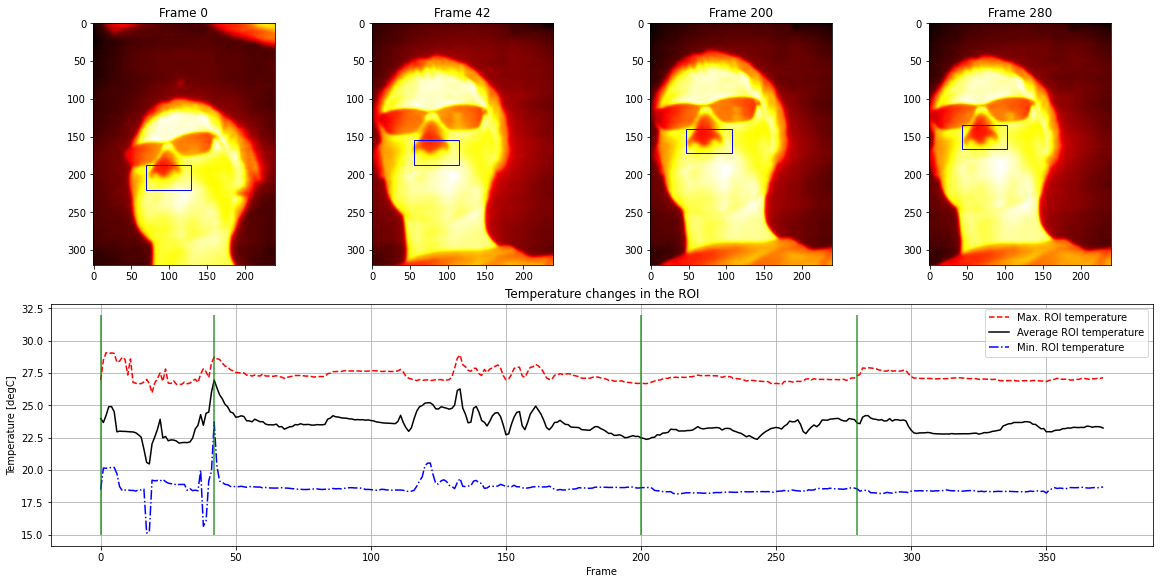

In [3]:
#Reading the data and tracking the Region Of Interest

start_frame = 18
example_img = ((img_frames[:,:,start_frame]/np.max(img_frames[:,:,start_frame]))*255).astype(np.uint8)
frame = cv2.cvtColor(np.array(example_img, np.uint8), cv2.COLOR_GRAY2BGR)
tracker = cv2.TrackerMIL_create() 

#ROI for start frame
bbox = (68, 188, 60, 32)

ret = tracker.init(frame, bbox)

avg_temp = np.zeros(num_frames-start_frame)
max_temp = np.zeros(num_frames-start_frame)
min_temp = np.zeros(num_frames-start_frame)

fig = plt.figure(constrained_layout=True, figsize=(16,8))
gs = GridSpec(2, 4, figure=fig)
 
# create sub plots as grid
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, :])

for i in range(num_frames-start_frame):
    example_img = ((img_frames[:,:,start_frame+i]/np.max(img_frames[:,:,start_frame+i]))*255).astype(np.uint8)
    frame = cv2.cvtColor(np.array(example_img, np.uint8), cv2.COLOR_GRAY2BGR)
    ret, bbox = tracker.update(frame)
    # ROI box
    a = bbox[0]
    b = bbox[1]
    c = bbox[2]
    d = bbox[3]
    # Average, max and min temperature in the ROI
    nose_frame = img_frames[b:(b+d),a:(a+c),i]
    avg_temp[i] = np.mean(nose_frame)
    max_temp[i] = np.max(nose_frame)
    min_temp[i] = np.min(nose_frame)
    #Plotting frames
    if i == 0:
        ax1.imshow(img_frames[:,:,start_frame+i], cmap='hot')
        ax1.add_patch(Rectangle((a,b),c,d,linewidth=1,edgecolor='b',facecolor='none',alpha=0.98))
        ax1.title.set_text('Frame 0')
    if i == 42:
        ax2.imshow(img_frames[:,:,start_frame+i], cmap='hot')
        ax2.add_patch(Rectangle((a,b),c,d,linewidth=1,edgecolor='b',facecolor='none',alpha=0.98))
        ax2.title.set_text('Frame 42')
    if i == 200:
        ax3.imshow(img_frames[:,:,start_frame+i], cmap='hot')
        ax3.add_patch(Rectangle((a,b),c,d,linewidth=1,edgecolor='b',facecolor='none',alpha=0.98))
        ax3.title.set_text('Frame 200')
    if i == 280:
        ax4.imshow(img_frames[:,:,start_frame+i], cmap='hot')
        ax4.add_patch(Rectangle((a,b),c,d,linewidth=1,edgecolor='b',facecolor='none',alpha=0.98))
        ax4.title.set_text('Frame 280')

#Plotting the temperature curves
ax5.plot(max_temp-0*max_temp.mean(),'r--')
ax5.plot(avg_temp-0*avg_temp.mean(),'k')
ax5.plot(min_temp-0*min_temp.mean(),'b-.')
ax5.grid()
ax5.title.set_text('Temperature changes in the ROI')
ax5.legend(['Max. ROI temperature','Average ROI temperature','Min. ROI temperature'])
ax5.vlines([0,42,200,280],15,32,'g',alpha=0.8)
ax5.set_xlabel('Frame')
ax5.set_ylabel('Temperature [degC]')

plt.show()

In [4]:
import scipy.fftpack

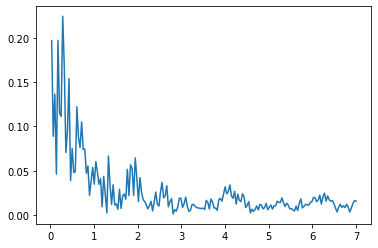

In [5]:
# Number of sample points
N = num_frames
# sample spacing
T = 1.0 / 15.0
x = np.linspace(0.0, N*T, N)
y = max_temp
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf[1:], (2.0/N * np.abs(yf[:N//2]))[1:])
plt.show()